### Titanic 승객의 생존여부 예측
* 1. Data Load
* 2. Data Preprocessing(전처리)
* 3. Visualization (시각화)
* 4. Feature Engineering(Selection)
* 5. train data로 GriddSearchCV를 사용해서 best paramter 찾기
* 6. Model 생성, fit, predict 
* 7. Submission(제출)

#### 1. Data Load

In [1]:
import pandas as pd

train = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
print(train.shape)
print(train.info())
train.head(3)

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')
print(test.shape)
print(test.info())
test.head(3)

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB
None


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
# null data 건수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [5]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 2. Data Preprocessing(전처리)
* Sex(성별) : 문자를 숫자로  male은 0, female 은 1 로 변경
* Pclass(등급) 
* Embarked(선착장) : One Hot Encoding
* Age
* Null data 처리

In [6]:
#성별
print(train['Sex'].unique())
train['Sex'].value_counts()

['male' 'female']


male      577
female    314
Name: Sex, dtype: int64

In [7]:
train_test_data = [train,test]

In [8]:
for data in train_test_data:
    # male은 0, female 은 1 로 변경
    data.loc[data['Sex'] == 'male','Sex'] = 0
    data.loc[data['Sex'] == 'female','Sex'] = 1

print(train['Sex'].value_counts())
print(test['Sex'].value_counts())
train.head(2)

0    577
1    314
Name: Sex, dtype: int64
0    266
1    152
Name: Sex, dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
#Pclass
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
#Embarked(선착장)
print(train['Embarked'].unique())
train['Embarked'].value_counts()

['S' 'C' 'Q' nan]


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
print(test['Embarked'].unique())
test['Embarked'].value_counts()

['Q' 'S' 'C']


S    270
C    102
Q     46
Name: Embarked, dtype: int64

##### One Hot Encoding
* 범주형 데이터를 인코딩
* C = [True,False,False], S = [False, True, False] , Q = [False, False, True]
* Embarked_C, Embarked_S, Embarked_Q 컬럼을 추가하기

In [12]:
for data in train_test_data:
    data['Embarked_C'] = data['Embarked'] == "C"
    data['Embarked_S'] = data['Embarked'] == "S"
    data['Embarked_Q'] = data['Embarked'] == "Q"

In [13]:
train[['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [14]:
test[['Embarked','Embarked_C','Embarked_S','Embarked_Q']].head()

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [15]:
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,False,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,False,False,False


In [16]:
#검증 데이터의 Fare(요금) null 처리
test.loc[test['Fare'].isnull(),'Fare'] = 0
test.loc[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,


In [17]:
#Age(나이) - null data를 전체 나이의 평균값으로 치환
for data in train_test_data:
    mean_age = data['Age'].mean()
    print(mean_age)
    data.loc[data['Age'].isnull(),'Age'] = mean_age

29.69911764705882
30.272590361445783


In [18]:
test.isnull().sum()

Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         327
Embarked        0
Embarked_C      0
Embarked_S      0
Embarked_Q      0
dtype: int64

#### 3. Visualization

In [19]:
%matplotlib inline

import seaborn as sns

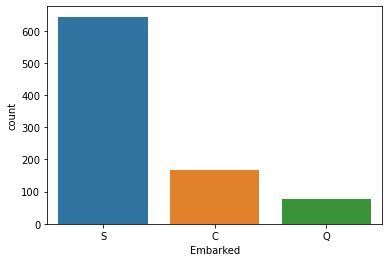

In [20]:
#Countplot(막대그래프) : x축, y축 중 하나만 설정할 수 있다. 
sns.countplot(data=train, x='Embarked')

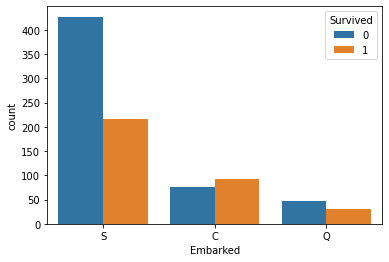

In [21]:
sns.countplot(data=train, x='Embarked', hue='Survived')

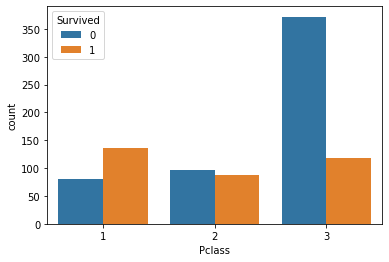

In [22]:
sns.countplot(data=train, x='Pclass',hue='Survived')

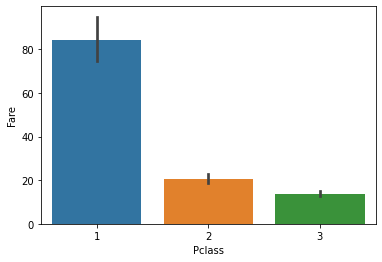

In [23]:
#Barplot : x축, y축 모두 설정할 수 있음
#Pclass(등급)와 Fare(요금) 관계
sns.barplot(data=train, x='Pclass', y='Fare')

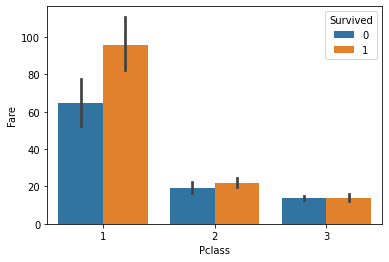

In [24]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

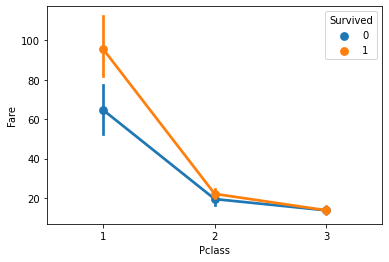

In [25]:
#Pointplot(선그래프) : x축과 y축 간의 관계 확인 할 수 있다
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


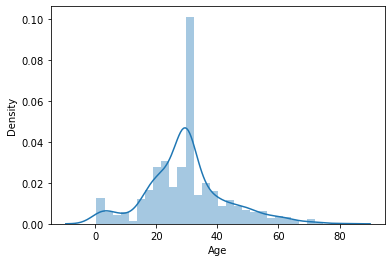

In [26]:
#Displot (히스토그램)
sns.distplot(train['Age'],hist=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


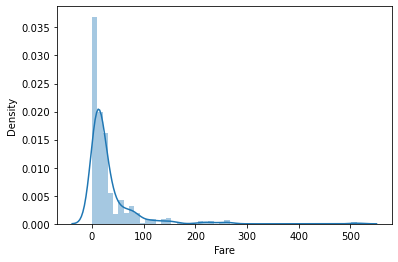

In [27]:
sns.distplot(train['Fare'],hist=True)

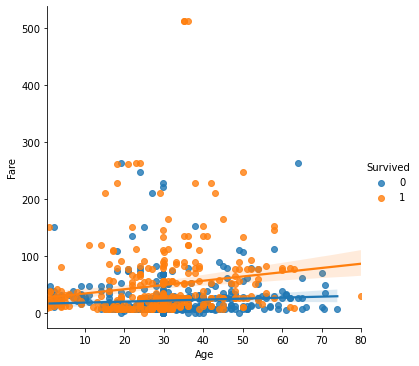

In [28]:
#Lmplot (산점도 + 회귀선)
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived', fit_reg=True)

#### 4. Feature Selection  & GridSearchCV로 Best Param 찾기

In [29]:
print(train.columns)
feature_names_org = ['Pclass','Sex','Fare','Embarked_C', 'Embarked_S', 'Embarked_Q','Age']
feature_names = ['Pclass','Sex','Fare','Embarked_C', 'Embarked_S', 'Embarked_Q']
feature_names

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Embarked_C', 'Embarked_S', 'Embarked_Q'],
      dtype='object')


['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'Embarked_Q']

In [30]:
#독립변수
train[feature_names].head()

,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False
4,1,1,53.1000,False,True,False
5,3,0,8.0500,False,True,False


In [31]:
#종속변수
train['Survived'].head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(train[feature_names],\
                                                 train['Survived'],test_size=0.2,\
                                                random_state=11)
print(train.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
model = DecisionTreeClassifier(random_state=11)
param_dict = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

grid = GridSearchCV(model, param_grid=param_dict, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
print('best parameter ',grid.best_params_)
print('best score ', grid.best_score_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

(891, 14)
(712, 6) (712,)
(179, 6) (179,)
best parameter  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score  0.7935684034275584
0.8659217877094972


#### 5. Model 생성, 학습, 예측하기

In [33]:
#훈련 데이터 독립변수 생성
X_train = train[feature_names]
print(X_train.shape)

#훈련 데이터 종속변수 생성
y_train = train['Survived']
print(y_train.shape)

(891, 6)
(891,)


In [34]:
print(y_train.head())
X_train.head(3)

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64


,Pclass,Sex,Fare,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0,7.2500,False,True,False
2,1,1,71.2833,True,False,False
3,3,1,7.9250,False,True,False


In [ ]:
# 검증 데이터 독립변수 생성
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

In [36]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)
#학습하기
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

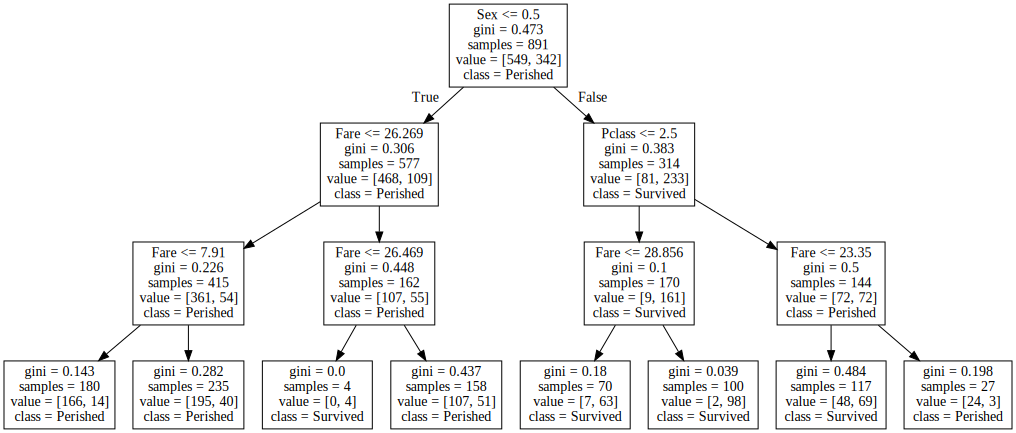

In [37]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, feature_names=feature_names, \
                class_names=['Perished','Survived'], out_file='titanic.dot')

with open('titanic.dot') as file:
    dot_graph = file.read()

graphviz.Source(dot_graph)    

In [38]:
#예측하기
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:20]

(418,)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

#### 6.Submission(제출하기)

In [39]:
submit = pd.read_csv('data/titanic/gender_submission.csv', index_col='PassengerId')
print(submit.shape)
submit.head(3)

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0


In [40]:
submit['Survived'] = predictions
print(submit.shape)
submit.head(3)

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0


In [41]:
#0.75837 
#0.77990
#0.77990
submit.to_csv('data/titanic/result02.csv')